# 과적합, 분산 편향 트레이드오프, 교차 검증

In [2]:
#필요한 라이브러리 임포트

import numpy as np
import pandas as pd
from eval_score_function import eval_score

# 교차검증

## 1. 사이킷런의 model_selection의 KFold()를 사용하는 경우(For loop 사용)

#### 폴드를 분리할 객체 생성

In [3]:
from sklearn.model_selection import KFold

#### 데이터를 준비하고 회귀 모형 객체를 생성

In [6]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

diab = load_diabetes()

X = diab.data
y = diab.target
# X,y

In [8]:
len(X)

442

#### split()함수를 호출하여 폴드별로 분리될 행 인덱스 세트를 구함

In [9]:
kfold = KFold(5) # k폴드를 5개로 할거야
list(kfold.split(X)) # 5개로 쫘라락 나눠짐 

[(array([ 89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
         102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
         115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
         128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
         141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
         167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
         180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
         193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
         206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
         219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
         232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
         245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257,
         258, 259, 260, 261, 262, 263,

kfold는 속성을 출력하는 것이 아니라 인덱스 번호만 갖고 있는 것임!!

데이터를 전부 다 굳이 kfold 에 올릴 필요가 없음 

학습은 사람이 직접 코드를 써서 하는 거임


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

r2_scores = []
lr = LinearRegression()

for train_idx, test_idx in kfold.split(X):
    # 2번 라운드의 테스트와 스플릿으로 두면 되는 것임
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    reg = lr.fit(X_train,y_train)
    y_pred = reg.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)


In [12]:
r2_scores #5개의 평균을 냄

[0.4295561538258379,
 0.5225993866099365,
 0.4826805413452825,
 0.42649776111040205,
 0.5502483366517519]

In [15]:
import numpy as np

for i, r2 in enumerate(r2_scores):
    print(i+1, f'- R2 = {r2:.3f}')

print(f"average: {np.round(np.mean(r2_scores),3)}")

1 - R2 = 0.430
2 - R2 = 0.523
3 - R2 = 0.483
4 - R2 = 0.426
5 - R2 = 0.550
average: 0.482


## 2. 사이킷런의 cross_val_score 함수를 사용하여 K폴드 교차 검증 수행 without shuffling:
- for loop 필요 없음

In [16]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

diab=load_diabetes()
X = diab.data
y = diab.target

lr = LinearRegression()

np.round(np.mean(cross_val_score(lr, X,y, cv=5)),3)

0.482

In [18]:
from sklearn.datasets import load_iris
import pandas as pd

iris  = load_iris()
X = iris.data
y = iris.target

iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['kind'] = iris.target
iris_df
# 이렇게 하면 문제는?
# y를 나눌때 문제가 됨 
# 왜?
# kind가 정렬이 되어 있음 -> 첫 라운드에서 다 틀리고, 두, 세번째 라운드에서 다 틀릴 것임  
# 그래서 이런 데이터는 셔플해줘야 함 
# 세 종류가 동일한 분포로 되어있도록 하려면 원래의 학습 데이터의 분포가 33.3 테스트 데이터도 33.3이 되어야 함!!
# 편중 되어있는 데이터를 셔플하고, fold하기 전에 분포도 맞춰놔야 하는 것임


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),kind
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 3. 사이킷런의 cross_val_score 함수를 사용하여 K폴드 교차 검증 수행 with shuffling

In [21]:
#셔플을 하자

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

diab=load_diabetes()
X = diab.data
y = diab.target

# kfold = KFold(5, shuffle=True, stratify= True) # 셔플 옵션 on, 분포 옵션 on, stratify는 '분류'일때만 쓸 수 있음 -> 그래서 여기서 못씀 iris 에서 써야함


kfold = KFold(5, shuffle=True, random_state= 29) # 셔플 옵션 on, stratify는 '분류'일때만 쓸 수 있음 

lr = LinearRegression()

np.round(np.mean(cross_val_score(lr, X,y, cv=kfold)),3)

0.489

## 과제: 올린다음 이야기할 예정 

250 자료 참고해서 해보기 

# 규제가 있는 선형회귀 - 릿지, 라쏘, 엘라스틱넷 회귀

#### 규제가 있는 모델 구축 - 당뇨병 데이터세트
#### 1. 데이터 전처리
-> 스케일링
#### 2. Ridge, Lasso, Elasticnet regression 구축: 회귀 계수 확인, 하이퍼 파라미터 탐색
-> 하이퍼 파라미터 찾기! 우리는 a만 지정하고 학습은 니가해~ 하고 맡길 수 있음 그게 라쏘CV임 
#### 3. 교차 검증으로 최적의 하이퍼파라미터 탐색: LassoCV()

In [22]:
# 관련 라이브러리 및 모듈 Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
import warnings
warnings.filterwarnings(action='ignore') # 워닝 뜨는거 안뜨게 하기 

In [25]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from eval_score_function import eval_score


In [27]:
def evaluate_score(y_test, y_pred) -> tuple():
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.square(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"mse - {mse:.3f}")
    print(f"rmse - {rmse:.3f}")
    print(f"R2 - {r2:.3f}")

    return (mse, rmse, r2)

In [28]:
from sklearn.datasets import load_diabetes

diab = load_diabetes()
diab.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [29]:
diab.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

# 0. 데이터 수집, 탐색, 준비

#### 데이터프레임 변환

데이터프레임 변환

In [30]:
diab_df = pd.DataFrame(data=diab.data, columns=diab.feature_names)
diab_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [32]:
# 누락치와 데이터 타입 확인 
diab_df.isnull().sum() # 이렇게 결측치를 찾는다 

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [33]:
# 결측치 확인하는 다른 방법
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [ ]:
# 독립변수(피처)와 종속변수를 DataFrame자료형으로 변환

In [ ]:
# 데이터셋 객체의 data 배열, 즉, 독립변수 X가되는 피처(특성)들을 DataFrame자료형으로 변환하여
# diab_df생성
# diab_df.head() 데이터 5개 확인



In [ ]:
# 누락치 확인,  data type 확인 ->  isnull().sum(), target에 결측값이 있으면 해당 관측치 제거

In [34]:
# X(독립변수), Y(종속변수) 분할
X = diab.data
y = diab.target

In [75]:
# 학습용, 평가용 데이터 분리
#testsize = 0.3 random_state =42
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


데이터 이제 준비 끝!

# 모델별 계수변화, 알파별 계수 비교 데이터프레임(comp_df)

a라는 하이퍼 파라미터를 변화시켜서 규제 강도를 조절하고 계수가 어떻게 변하는지 확인해보자 

그걸 저장할 df하나 만들자 

In [37]:
#각 모델별 계수로 이루어진 데이터프레임 준비
comp_df = pd.DataFrame(index=diab.feature_names+["R2 score"])
comp_df
#계수, 회귀계수 , 평가도 볼건데 R2만 일단 확인해보자 

""
age
sex
bmi
bp
s1
s2
s3
s4
s5
s6


In [ ]:
#각 모델별, 규제강도별 평가지표 저장


# 1. 규제가 없는 선형모델

비교 대상이 될 규제 없는 선형 모델을 만들어보자 

In [49]:
#모델 구축 및 학습
model_LR = LinearRegression()

model_LR.fit(X_train, y_train)
#모델 평가
y_train = model_LR.predict(X_test)
evaluate_score(y_test, y_train)

# 회귀 계수 확인


mse - 2821.751
rmse - 7962278.599
R2 - 0.477


(2821.7509810013107, 7962278.5987818595, 0.4772897164322617)

In [50]:
LR_coef = pd.Series(model_LR.coef_, index = diab.feature_names)
print(LR_coef)

age     29.254013
sex   -261.706469
bmi    546.299723
bp     388.398341
s1    -901.959668
s2     506.763241
s3     121.154351
s4     288.035267
s5     659.268951
s6      41.376701
dtype: float64


<BarContainer object of 10 artists>

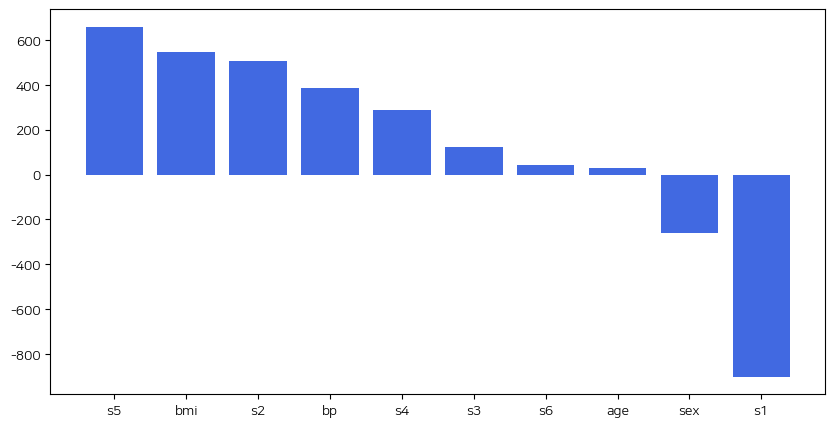

In [56]:

coef = LR_coef.sort_values(ascending=False)

#시각화
import matplotlib as mpl
mpl.rc('axes', unicode_minus=False) 
plt.figure(figsize=(10, 5))
plt.bar(coef.index, coef.values, color ="royalblue")

=====
s1     901.959668
s5     659.268951
bmi    546.299723
s2     506.763241
bp     388.398341
s4     288.035267
sex    261.706469
s3     121.154351
s6      41.376701
age     29.254013
dtype: float64


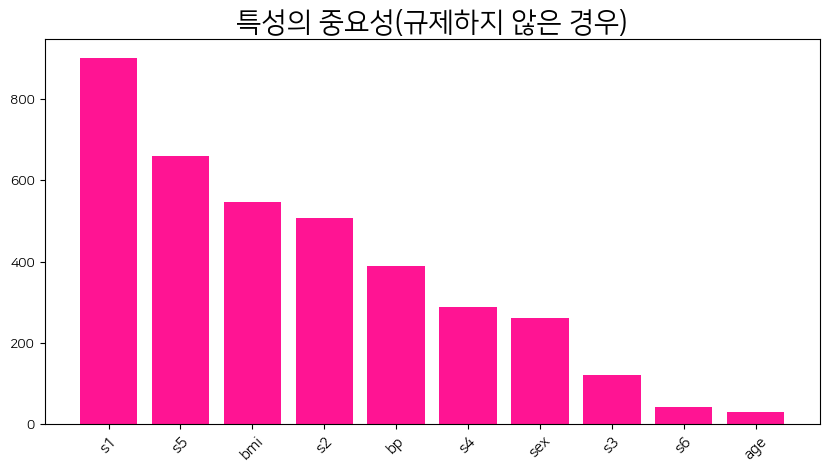

In [67]:
# 아니면 절대값을 씌워서 영향을 얼마나 주는지를 보자 
coef = np.abs(LR_coef).sort_values(ascending = False)
print("=====")
print(coef)
plt.figure(figsize=(10, 5))
plt.title("특성의 중요성(규제하지 않은 경우)", fontsize = 20)
#plt.title ("feature importance of coefficients without Regulization")
plt.bar(coef.index, coef.values, color ="deeppink")
plt.xticks(coef.index, rotation =45 , fontsize =11);


- 계수값 시각화

In [ ]:


# 시각화


In [69]:
# 모델별 비교 데이터프레임 열 추가
#이 결과를 comp_df에 저장하자 
comp_df["LR"] = np.append(model_LR.coef_, r2)

In [70]:
comp_df

,LR
age,29.254013
sex,-261.706469
bmi,546.299723
bp,388.398341
s1,-901.959668
s2,506.763241
s3,121.154351
s4,288.035267
s5,659.268951
s6,41.376701


# 1. 릿지 모델

In [76]:
from sklearn.linear_model import Ridge

model_Ridge = Ridge() #model_Ridge = Ridge(alpha=1)과 같은 소리임  
model_Ridge.fit(X_train, y_train)
# 이렇게 학습이 끝나나? 
# 규제 강도 주지 않으면 디폴트로 1.0을 준다 

Ridge()

In [77]:
# 릿지 선형회귀 모델 평가: model_Ridge1, alpha=1
y_pred = model_Ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
# a=1일때 회귀 계수 확인
coef = model_Ridge.coef_
coef

array([  45.05421022,  -71.94739737,  280.71625182,  195.21266175,
         -2.22930269,  -17.54079744, -148.68886188,  120.46723979,
        198.61440137,  106.93469215])

In [ ]:
# 선형 모델 평가


#a = 1 릿지 모델 회귀 계수


- 계수값 시각화

bmi    280.716252
s5     198.614401
bp     195.212662
s3     148.688862
s4     120.467240
s6     106.934692
sex     71.947397
age     45.054210
s2      17.540797
s1       2.229303
dtype: float64


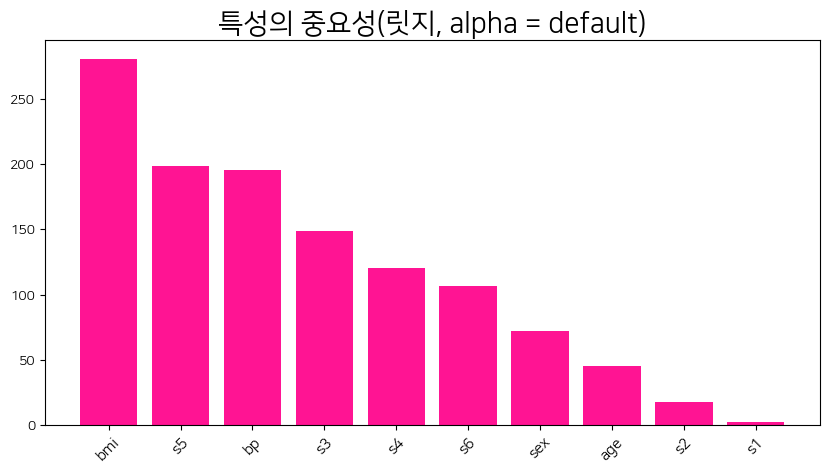

In [81]:
coef = pd.Series(np.abs(model_Ridge.coef_), index = diab.feature_names)
coef = coef.sort_values(ascending= False)

# 시각화
print(coef)
plt.figure(figsize=(10, 5))
plt.title("특성의 중요성(릿지, alpha = default)", fontsize = 20)
#plt.title ("feature importance of coefficients without Regulization")
plt.bar(coef.index, coef.values, color ="deeppink")
plt.xticks(coef.index, rotation =45 , fontsize =11);

#회귀계수가 미치는 영향이 작아졌구나! 

In [82]:
coef =pd.Series(model_Ridge.coef_, index= diab.feature_names)
coef

age     45.054210
sex    -71.947397
bmi    280.716252
bp     195.212662
s1      -2.229303
s2     -17.540797
s3    -148.688862
s4     120.467240
s5     198.614401
s6     106.934692
dtype: float64

In [87]:
# alpha_list=[0.01, 1, 10, 100]인 경우
alpha_list = [0.01, 1, 10, 100] # 알파 값 조정
for each_alpha in alpha_list:
    model_Ridge = Ridge(alpha=each_alpha)
    #선형회귀 수행: 학습
    model_Ridge.fit(X_train, y_train)
    y_pred = model_Ridge.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    #4쌍이 나올거임 
    col_name = f'Ridge(alpha = {each_alpha:.2f})'
    comp_df[col_name] = np.append(model_Ridge.coef_, r2)

In [88]:
comp_df

,LR,Ridge(alpha = 0.01),Ridge(alpha = 1.00),Ridge(alpha = 10.00),Ridge(alpha = 100.00)
age,29.254013,34.167328,45.054210,16.230889,2.072848
sex,-261.706469,-254.043316,-71.947397,-2.961367,-0.003808
bmi,546.299723,550.844882,280.716252,59.524160,6.899915
bp,388.398341,379.126708,195.212662,43.421300,5.085100
s1,-901.959668,-404.253263,-2.229303,13.875073,2.069660
s2,506.763241,123.029219,-17.540797,10.865267,1.743748
s3,121.154351,-99.041674,-148.688862,-37.495847,-4.508876
s4,288.035267,215.032624,120.467240,38.728538,4.902421
s5,659.268951,463.842634,198.614401,49.224746,5.926496
s6,41.376701,50.351490,106.934692,34.737987,4.328698


릿지 규제는 원래의 손실함수에 규제를 하는 것인데 
가중치의 제곱을 추가한 것인데 
a가 매우 커지면 전채 비용함수에서 mse는 영향을 못미치고 가중치가 0에 가까워진다 ->a 커지면 커질수록 계수가 작아진다 
-

# 2. 라쏘 모델

In [89]:
from sklearn.linear_model import Lasso

# alpha = 1 이게 디폴트임 
model_Lasso = Lasso(alpha=1)
model_Lasso.fit(X_train, y_train)


Lasso(alpha=1)

In [91]:
# 라쏘 선형회귀 모델 평가(alpha=1)
# 선형 모델 평가
y_pred = model_Lasso.predict(X_test)
r2= r2_score (y_test, y_pred)
print(r2)
#a = 1 라쏘 모델 회귀 계수

Lasso_coef = pd.Series(model_Lasso.coef_, index = diab.feature_names)
Lasso_coef
#0인 애들이 수두룩해짐 즉, 이 계수가 미치는 영향을 빼버렸다는 것임 
# 종속변수에게 영향을 덜 미칠 것이라는 것을 볼 수 있음 
# 다중공선성 -> 1. 다중계수의 상관관계 보세요 
# 2. 라쏘 모델 돌려보세요 
# 특성 선택을 하는 데에 도움을 주기도 한다 

0.36189802861957876


age      0.000000
sex     -0.000000
bmi    443.703388
bp      51.601094
s1       0.000000
s2       0.000000
s3      -0.000000
s4       0.000000
s5     201.966478
s6       0.000000
dtype: float64

- 계수 시각화

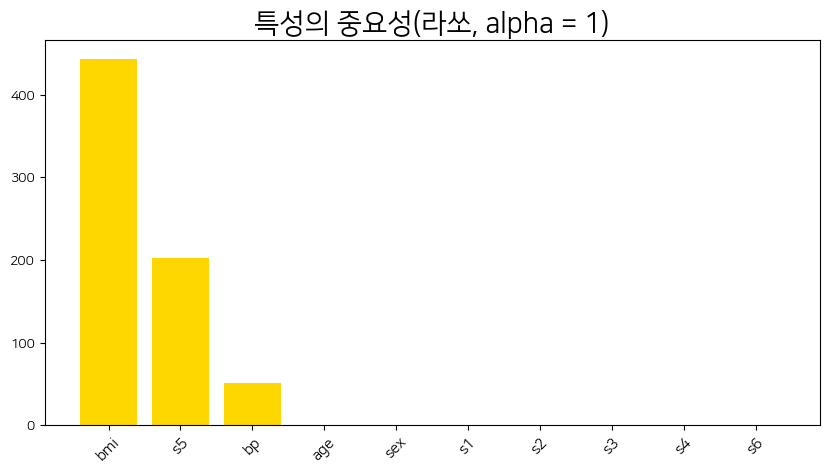

In [96]:
coef = np.abs(Lasso_coef)
coef = pd.Series(coef, index = diab.feature_names).sort_values(ascending= False)
# 시각화
plt.figure(figsize=(10, 5))
plt.title("특성의 중요성(라쏘, alpha = 1)", fontsize = 20)
#plt.title ("feature importance of coefficients without Regulization")
plt.bar(coef.index, coef.values, color ="gold")
plt.xticks(coef.index, rotation =45 , fontsize =11);

In [97]:
# alpha_list=[0.01, 1, 10, 100]인 경우
alpha_list = [0.01, 1, 10, 100] # 알파 값 조정
for each_alpha in alpha_list:
    model_Lasso = Lasso(alpha=each_alpha)
    #선형회귀 수행: 학습
    model_Lasso.fit(X_train, y_train)
    y_pred = model_Lasso.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    #4쌍이 나올거임 
    col_name = f'Lasso(alpha = {each_alpha:.2f})'
    comp_df[col_name] = np.append(model_Lasso.coef_, r2)

In [98]:
comp_df

,LR,Ridge(alpha = 0.01),Ridge(alpha = 1.00),Ridge(alpha = 10.00),Ridge(alpha = 100.00),Lasso(alpha = 0.01),Lasso(alpha = 1.00),Lasso(alpha = 10.00),Lasso(alpha = 100.00)
age,29.254013,34.167328,45.054210,16.230889,2.072848,28.246364,0.000000,0.000000,0.000000
sex,-261.706469,-254.043316,-71.947397,-2.961367,-0.003808,-250.819184,-0.000000,0.000000,0.000000
bmi,546.299723,550.844882,280.716252,59.524160,6.899915,556.215874,443.703388,0.000000,0.000000
bp,388.398341,379.126708,195.212662,43.421300,5.085100,380.659502,51.601094,0.000000,0.000000
s1,-901.959668,-404.253263,-2.229303,13.875073,2.069660,-468.739540,0.000000,0.000000,0.000000
s2,506.763241,123.029219,-17.540797,10.865267,1.743748,166.993417,0.000000,0.000000,0.000000
s3,121.154351,-99.041674,-148.688862,-37.495847,-4.508876,-60.219459,-0.000000,-0.000000,-0.000000
s4,288.035267,215.032624,120.467240,38.728538,4.902421,230.916253,0.000000,0.000000,0.000000
s5,659.268951,463.842634,198.614401,49.224746,5.926496,492.634358,201.966478,0.000000,0.000000
s6,41.376701,50.351490,106.934692,34.737987,4.328698,43.969346,0.000000,0.000000,0.000000


# 3. 엘라스틱넷 모델

In [ ]:


# 모델 구축 및 학습(alpha=1, l1_ratio=0.5)


In [ ]:
#모델 평가 및 회귀 계수 확인
# 엘라스틱넷 선형회귀 모델 평가(alpha=1, L1_ratio=0.5)
# 선형 모델 평가


#a = 1 엘라스틱넷 모델 회귀 계수


- 계수 시각화

In [ ]:


# 시각화


In [ ]:
# alpha_list=[0.01, 1, 10, 100]인 경우, l1_ratio=0.5 



### LassoCV() : k-폴드 교차 검증으로 최적의 Lasso 모델 하이퍼파라미터 alpha 찾기

In [ ]:
#LassoCV()에 필요한 매개변수 설정
#0.01 ~ 9.91 까지 alpha_list  생성


- 모델 학습

## [응용] 보스턴 주택가격 데이터를 활용하여, 규제가 없을때, 리지, 라쏘, 엘라스틱넷 선형회귀를 수행하고 각각의 회귀계수 및 예측 성능을 비교하라
테스트 사이즈:0.3
random_state=42
